# Sberbank Russian Housing Market EDA
This notebook uses a dataset from [Kaggle's Sberbank Russian Housing Market](https://www.kaggle.com/c/sberbank-russian-housing-market) competition:
> In this competition, Sberbank is challenging Kagglers to develop algorithms which use a broad spectrum of features to predict realty prices. Competitors will rely on a rich dataset that includes housing data and macroeconomic patterns. An accurate forecasting model will allow Sberbank to provide more certainty to their customers in an uncertain economy.

## Load data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 300)

In [4]:
train = pd.read_csv('train.csv')
train.shape

(30471, 292)

In [5]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

## Target variable

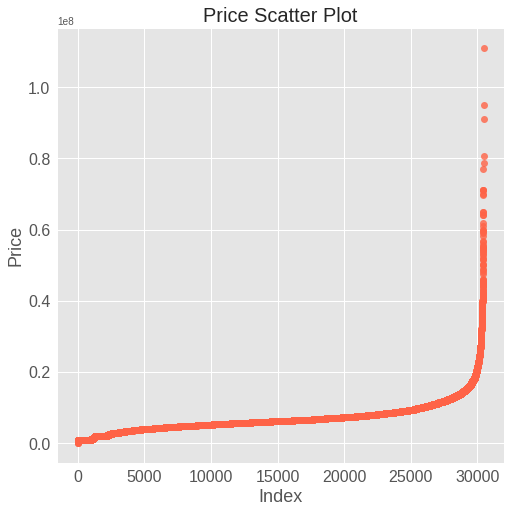

In [6]:
plt.figure(figsize=(8,8))
plt.tick_params(labelsize=16)

sns.regplot(train.index.values, np.sort(train.price_doc), fit_reg=False, color='tomato')

plt.xlabel('Index', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Price Scatter Plot', fontsize=20)
plt.show()

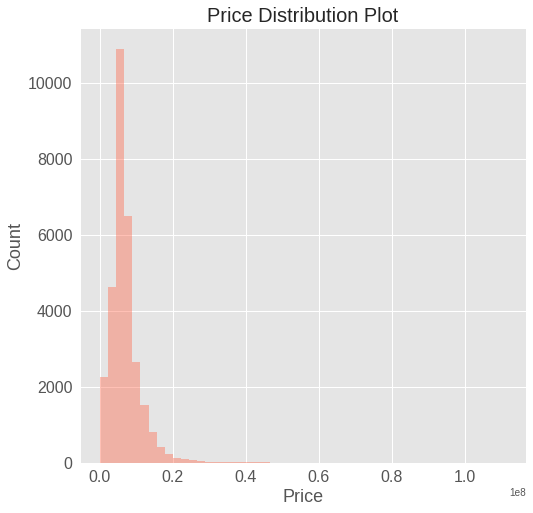

In [7]:
plt.figure(figsize=(8,8))
plt.tick_params(labelsize=16)

sns.distplot(train.price_doc, bins=50, kde=False, color='tomato')

plt.xlabel('Price', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Price Distribution Plot', fontsize=20)
plt.show()

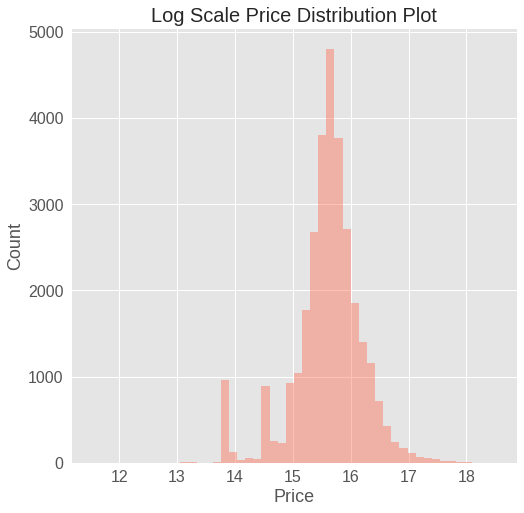

In [8]:
plt.figure(figsize=(8,8))
plt.tick_params(labelsize=16)

sns.distplot(np.log(train.price_doc), bins=50, kde=False, color='tomato')

plt.xlabel('Price', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Log Scale Price Distribution Plot', fontsize=20)
plt.show()

## Time series

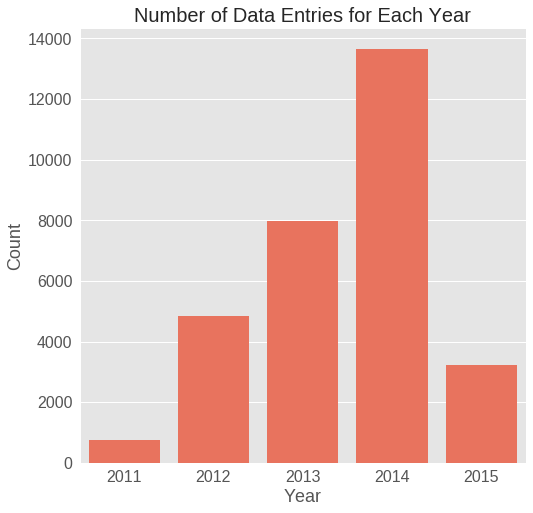

In [66]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
train['year'] = train['timestamp'].dt.year

plt.figure(figsize=(8,8))
plt.tick_params(labelsize=16)

sns.countplot(train.year, color='tomato')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Number of Data Entries for Each Year', fontsize=20)
plt.show()

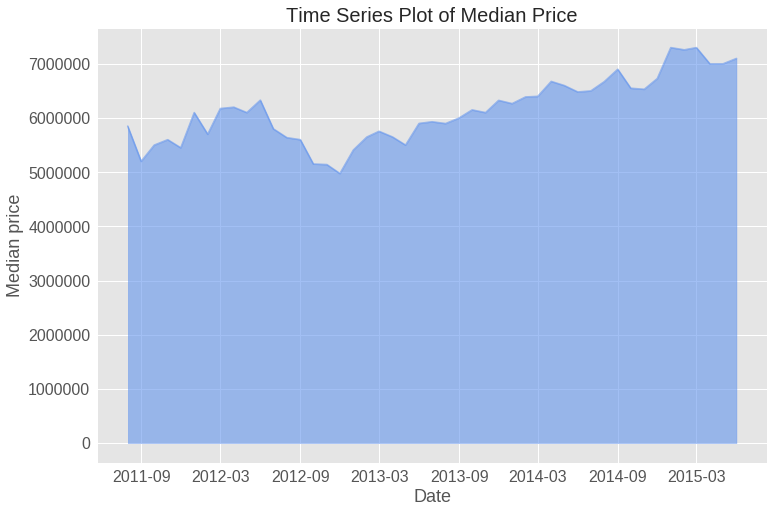

In [67]:
from pylab import fill_between

train['year_month'] = train['timestamp'].apply(lambda x: x.strftime('%Y-%m')) 

data = train.groupby('year_month')['price_doc'].median().reset_index()
data.year_month = pd.to_datetime(data.year_month)

plt.figure(figsize=(12,8))
plt.tick_params(labelsize=16)

plt.plot(data.year_month, data.price_doc, color='cornflowerblue', alpha=0.6)
plt.fill_between(data.year_month.values, data.price_doc, color='cornflowerblue', alpha=0.6)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Median price', fontsize=18)
plt.title('Time Series Plot of Median Price', fontsize=20)
plt.show()

## Missing values

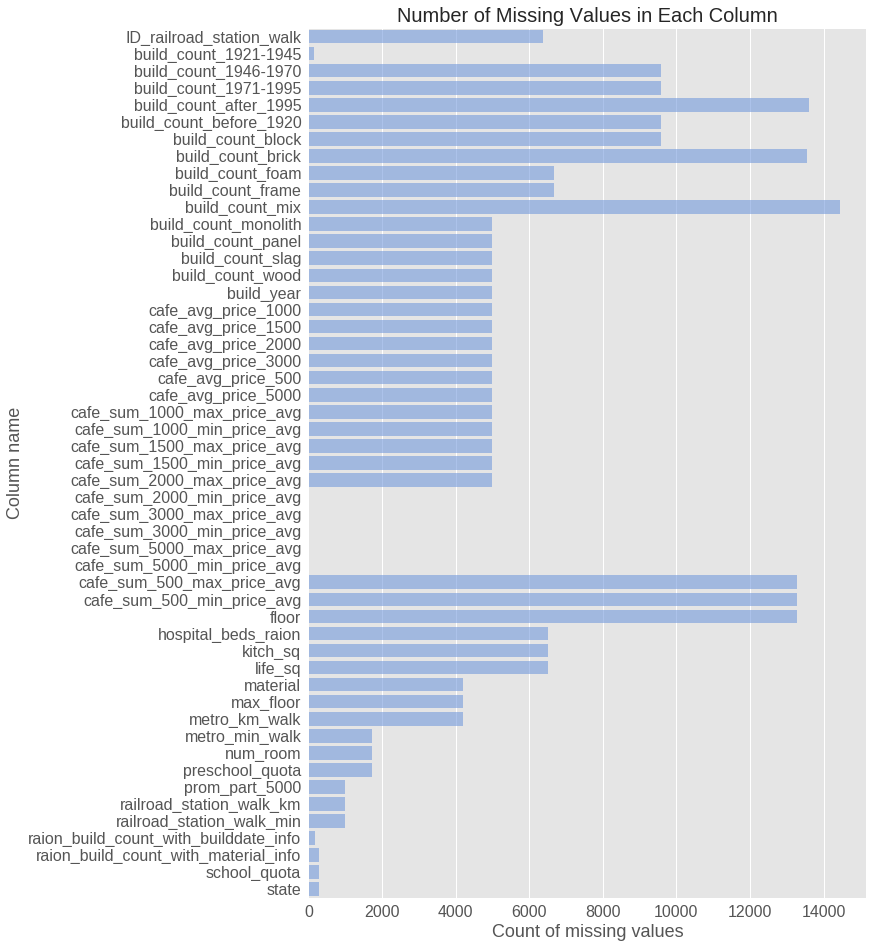

In [26]:
missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing.ix[missing['missing_count']>0]

plt.figure(figsize=(10,16))
plt.tick_params(labelsize=16)

sns.barplot(missing.missing_count, sorted(missing.column_name), orient='h', color='cornflowerblue', alpha=0.6)

plt.xlabel('Count of missing values', fontsize=18)
plt.ylabel('Column name', fontsize=18)
plt.title('Number of Missing Values in Each Column', fontsize=20)
plt.show()